In [13]:
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Cargar el archivo
df_amazon = pd.read_csv('Amazon_stock_data.csv')

# Ver las primeras filas
df_amazon.head()

,Date,Close,High,Low,Open,Volume
0,1997-05-15,0.097917,0.125000,0.096354,0.121875,1443120000
1,1997-05-16,0.086458,0.098958,0.085417,0.098438,294000000
2,1997-05-19,0.085417,0.088542,0.081250,0.088021,122136000
3,1997-05-20,0.081771,0.087500,0.081771,0.086458,109344000
4,1997-05-21,0.071354,0.082292,0.068750,0.081771,377064000


In [3]:
# Seleccionar variables predictoras y la respuesta
X = df_amazon[['Open', 'High', 'Low', 'Volume']]
y = df_amazon['Close']

In [10]:
X_const = sm.add_constant(X)  # Añadir constante para el término independiente

In [11]:
modelo = sm.OLS(y, X_const).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.471e+07
Date:                Tue, 24 Jun 2025   Prob (F-statistic):               0.00
Time:                        15:21:37   Log-Likelihood:                -5245.9
No. Observations:                7067   AIC:                         1.050e+04
Df Residuals:                    7062   BIC:                         1.054e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0033      0.011      0.311      0.7

In [ ]:
selector = SequentialFeatureSelector(LinearRegression(), direction='forward')
selector.fit(X, y)

# Mostrar variables seleccionadas
features_selected = X.columns[selector.get_support()]
print("Variables seleccionadas:", list(features_selected))


Variables seleccionadas: ['High', 'Low']


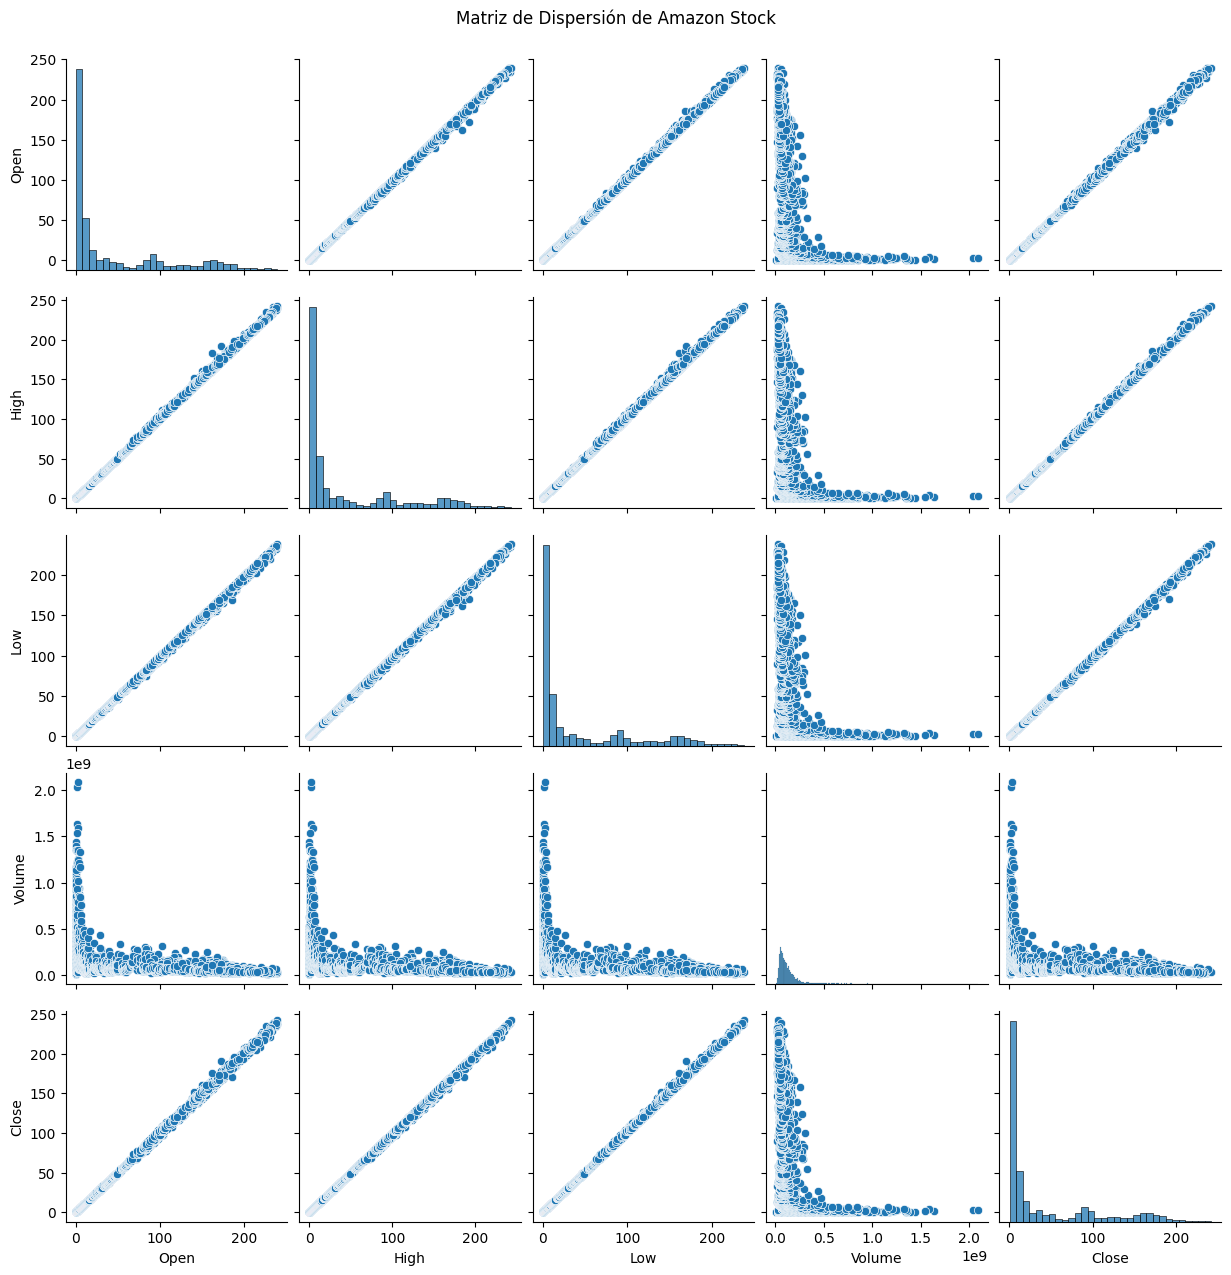

In [14]:
df_plot = df_amazon[['Open', 'High', 'Low', 'Volume', 'Close']]
sns.pairplot(df_plot)
plt.suptitle("Matriz de Dispersión de Amazon Stock", y=1.02)
plt.show()